In [2]:
import numpy as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [24]:
data1_url="https://raw.githubusercontent.com/digipodium/Datasets/main/Salary_Data.csv"
df=pd.read_csv(data1_url)
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape

(30, 2)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

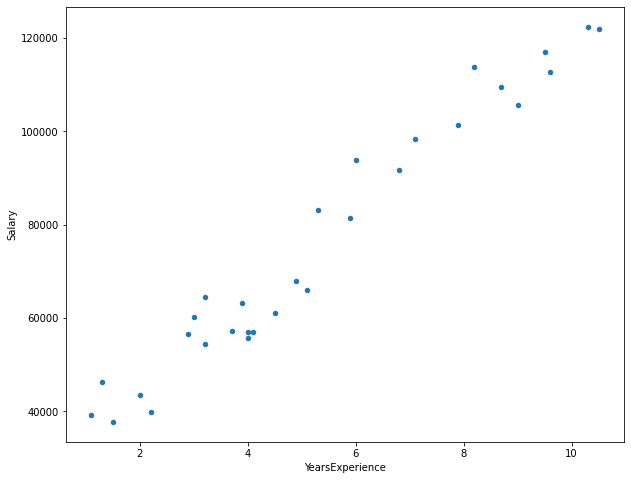

In [5]:
df.plot(x='YearsExperience',y='Salary',kind='scatter',figsize=(10,8))

In [6]:
x=df[['YearsExperience']]
y=df[['Salary']]

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)

In [8]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [9]:
score=reg.score(xtest,ytest) * 100
print(f'the Years{score}% for our model')

the Years76.16681465472094% for our model


In [10]:
reg.predict(xtest)

array([[75074.50510972],
       [91873.8056381 ],
       [62008.38247653],
       [81607.56642631],
       [67608.14931932],
       [89073.92221671]])

In [11]:
df['prediction']=reg.predict(x)
df.head()

,YearsExperience,Salary,prediction
0,1.1,39343.0,35876.137210
1,1.3,46205.0,37742.726158
2,1.5,37731.0,39609.315105
3,2.0,43525.0,44275.787474
4,2.2,39891.0,46142.376422


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

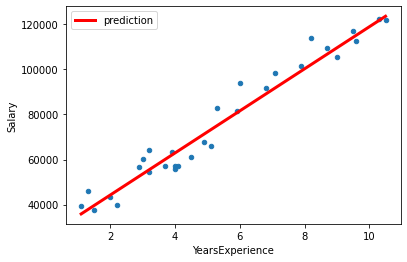

In [12]:
ax=df.plot(kind='scatter',x='YearsExperience',y='Salary')
df.plot(x='YearsExperience',y='prediction',ax=ax,color='red',linewidth=3)


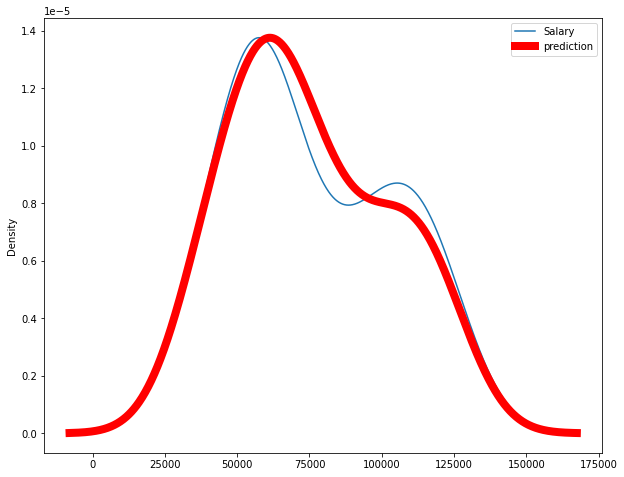

In [13]:
ax=df.plot(kind='kde',x='YearsExperience',y='Salary',figsize=(10,8))
df.plot(kind='kde',x='YearsExperience',y='prediction',ax=ax,color='red',alpha=1,linewidth=8)#alpha use for tranprancey
plt.show()

In [14]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [15]:
r2_score(df.Salary,df.prediction)

0.9559200375146585

In [16]:
mean_absolute_error(df.Salary,df.prediction)

4683.968799235212

In [17]:
mean_squared_error(df.Salary,df.prediction)

32024060.20283364

In [18]:
from joblib import dump #for dumpuing the data the feild

In [19]:
dump(reg,"faaltu_model_v2.pkl")

['faaltu_model_v2.pkl']

In [20]:
del x

In [21]:
from joblib import load

In [22]:
reg=load("faaltu_model_v2.pkl")

In [23]:
reg.predict([[14],[54]])

C:\Users\DELL\miniconda3\envs\digi12\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[156271.12433025],
       [529588.91384996]])